In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_summary_df = pd.read_csv("Match_dataset.csv")
# Descriptive statistics for numerical features
print("\n--- Descriptive Statistics for Numerical Features ---")
# We'll focus on target_runs and wickets_lost_inn1 for prediction
print(match_summary_df[['target_runs', 'wickets_lost_inn1']].describe())

# Value counts for key categorical features
print("\n--- Value Counts for Venue (Top 5) ---")
print(match_summary_df['venue'].value_counts().nlargest(5))

print("\n--- Value Counts for Toss Decision ---")
print(match_summary_df['toss_decision'].value_counts())


--- Descriptive Statistics for Numerical Features ---
       target_runs  wickets_lost_inn1
count   963.000000          963.00000
mean    166.964694            6.11215
std      33.337448            2.11565
min      43.000000            0.00000
25%     147.000000            4.00000
50%     168.000000            6.00000
75%     188.000000            8.00000
max     288.000000           10.00000

--- Value Counts for Venue (Top 5) ---
Wankhede Stadium                      108
Eden Gardens                           87
MA Chidambaram Stadium                 79
Rajiv Gandhi International Stadium     69
M Chinnaswamy Stadium                  67
Name: venue, dtype: int64

--- Value Counts for Toss Decision ---
field    619
bat      344
Name: toss_decision, dtype: int64


C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\3701404796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chasing_team_won', data=match_summary_df, palette='viridis')


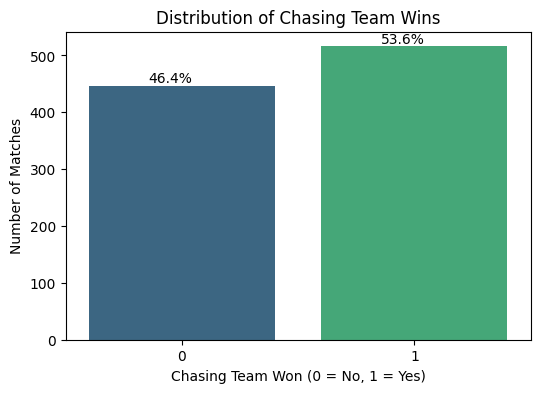

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='chasing_team_won', data=match_summary_df, palette='viridis')
plt.title('Distribution of Chasing Team Wins')
plt.xlabel('Chasing Team Won (0 = No, 1 = Yes)')
plt.ylabel('Number of Matches')
# Add percentages on top of bars
total = len(match_summary_df)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

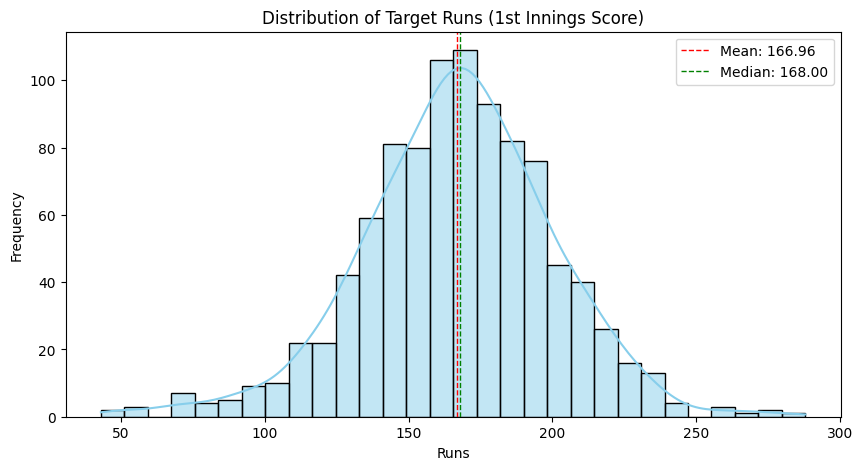

C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\2663400656.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='wickets_lost_inn1', data=match_summary_df, palette='pastel')


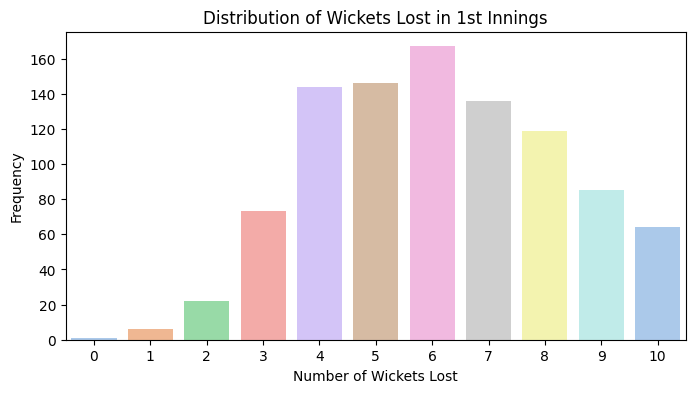

In [4]:
# Distribution of Target Runs set in the 1st Innings
plt.figure(figsize=(10, 5))
sns.histplot(match_summary_df['target_runs'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Target Runs (1st Innings Score)')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.axvline(match_summary_df['target_runs'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {match_summary_df['target_runs'].mean():.2f}")
plt.axvline(match_summary_df['target_runs'].median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {match_summary_df['target_runs'].median():.2f}")
plt.legend()
plt.show()

# Distribution of Wickets Lost in the 1st Innings
plt.figure(figsize=(8, 4))
sns.countplot(x='wickets_lost_inn1', data=match_summary_df, palette='pastel')
plt.title('Distribution of Wickets Lost in 1st Innings')
plt.xlabel('Number of Wickets Lost')
plt.ylabel('Frequency')
plt.show()

C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\363190045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='toss_decision', data=match_summary_df, palette='coolwarm')


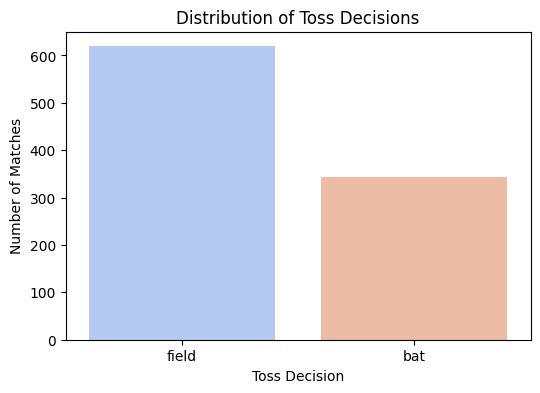

C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\363190045.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='venue', data=match_summary_df[match_summary_df['venue'].isin(top_venues)], order=top_venues, palette='Spectral')


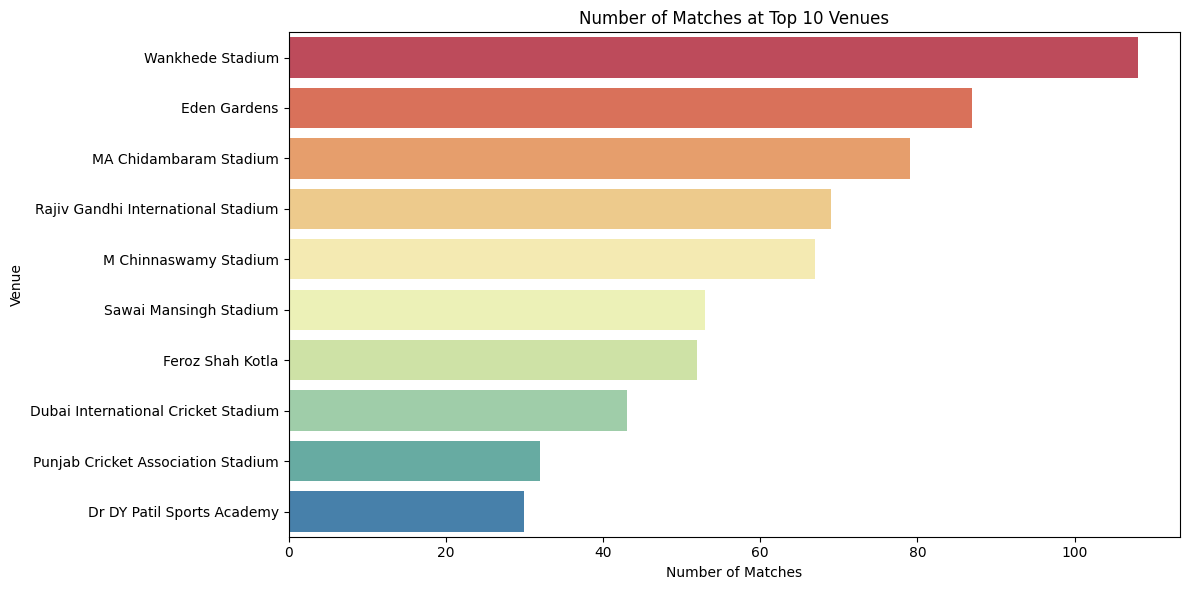

In [5]:
# Distribution of Toss Decisions
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', data=match_summary_df, palette='coolwarm')
plt.title('Distribution of Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.show()

# Top N Venues
if len(match_summary_df['venue'].unique()) > 10: # only plot if many venues
    plt.figure(figsize=(12, 6))
    top_venues = match_summary_df['venue'].value_counts().nlargest(10).index
    sns.countplot(y='venue', data=match_summary_df[match_summary_df['venue'].isin(top_venues)], order=top_venues, palette='Spectral')
    plt.title('Number of Matches at Top 10 Venues')
    plt.xlabel('Number of Matches')
    plt.ylabel('Venue')
    plt.tight_layout()
    plt.show()

C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\400470891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chasing_team_won', y='target_runs', data=match_summary_df, palette='PRGn')


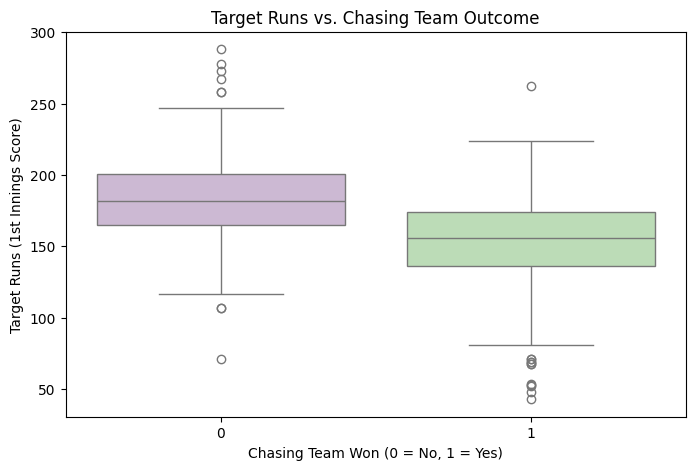

C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\400470891.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chasing_team_won', y='wickets_lost_inn1', data=match_summary_df, palette='PRGn')


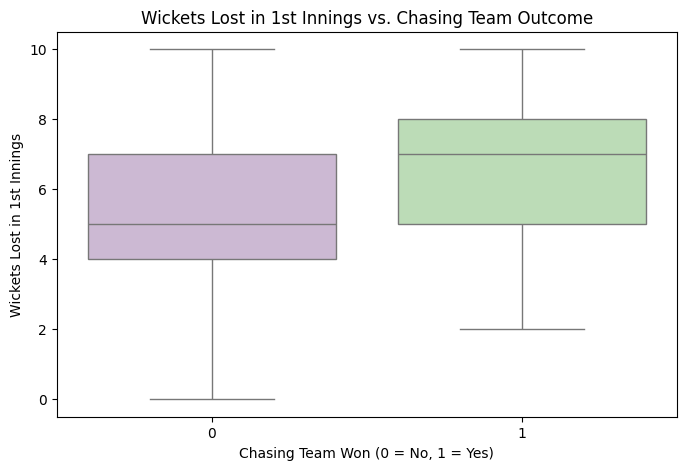

In [6]:
# Target Runs vs. Chasing Team Won
plt.figure(figsize=(8, 5))
sns.boxplot(x='chasing_team_won', y='target_runs', data=match_summary_df, palette='PRGn')
plt.title('Target Runs vs. Chasing Team Outcome')
plt.xlabel('Chasing Team Won (0 = No, 1 = Yes)')
plt.ylabel('Target Runs (1st Innings Score)')
plt.show()

# Wickets Lost in 1st Innings vs. Chasing Team Won
plt.figure(figsize=(8, 5))
sns.boxplot(x='chasing_team_won', y='wickets_lost_inn1', data=match_summary_df, palette='PRGn')
plt.title('Wickets Lost in 1st Innings vs. Chasing Team Outcome')
plt.xlabel('Chasing Team Won (0 = No, 1 = Yes)')
plt.ylabel('Wickets Lost in 1st Innings')
plt.show()

match_summary_df.head()

In [7]:
match_summary_df.head()

,match_id,season,city,date,venue,team1_bat_first,team2_chase,toss_winner,toss_decision,target_runs,wickets_lost_inn1,winner,chasing_team_won
0,335982,2008,Bangalore,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,223,3,Kolkata Knight Riders,0
1,335983,2008,Chandigarh,19-04-2008,Punjab Cricket Association Stadium,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,241,5,Chennai Super Kings,0
2,335984,2008,Delhi,19-04-2008,Feroz Shah Kotla,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,130,8,Delhi Capitals,1
3,335985,2008,Mumbai,20-04-2008,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,166,7,Royal Challengers Bengaluru,1
4,335986,2008,Kolkata,20-04-2008,Eden Gardens,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,111,10,Kolkata Knight Riders,1


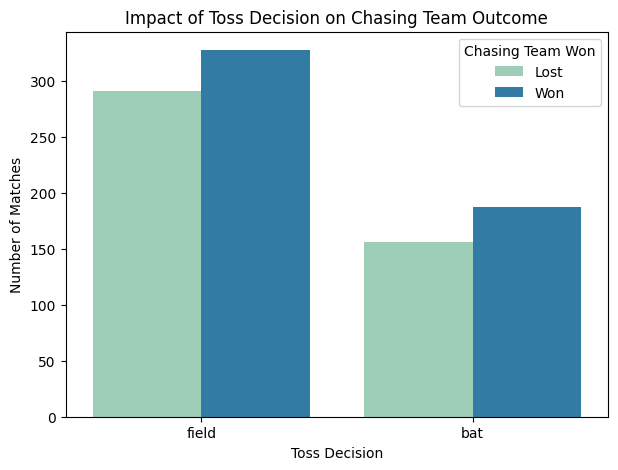

C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\2247395582.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='chaser_won_toss_and_fielded', y='chasing_team_won', data=match_summary_df, palette='magma', ci=None)
C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\2247395582.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='chaser_won_toss_and_fielded', y='chasing_team_won', data=match_summary_df, palette='magma', ci=None)


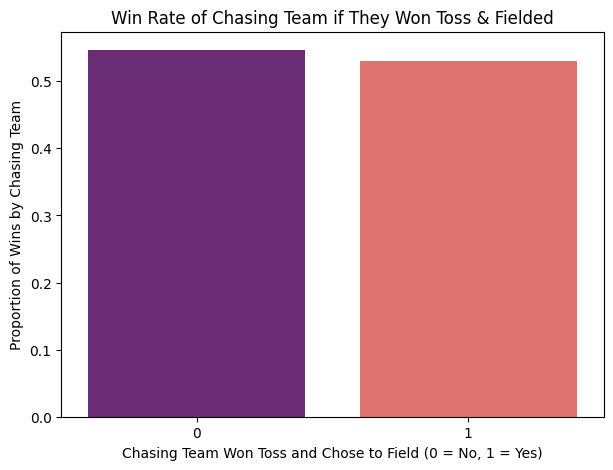

C:\Users\nikku\AppData\Local\Temp\ipykernel_15008\2247395582.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=venue_win_rates.index, x=venue_win_rates.values, palette='viridis_r', orient='h')


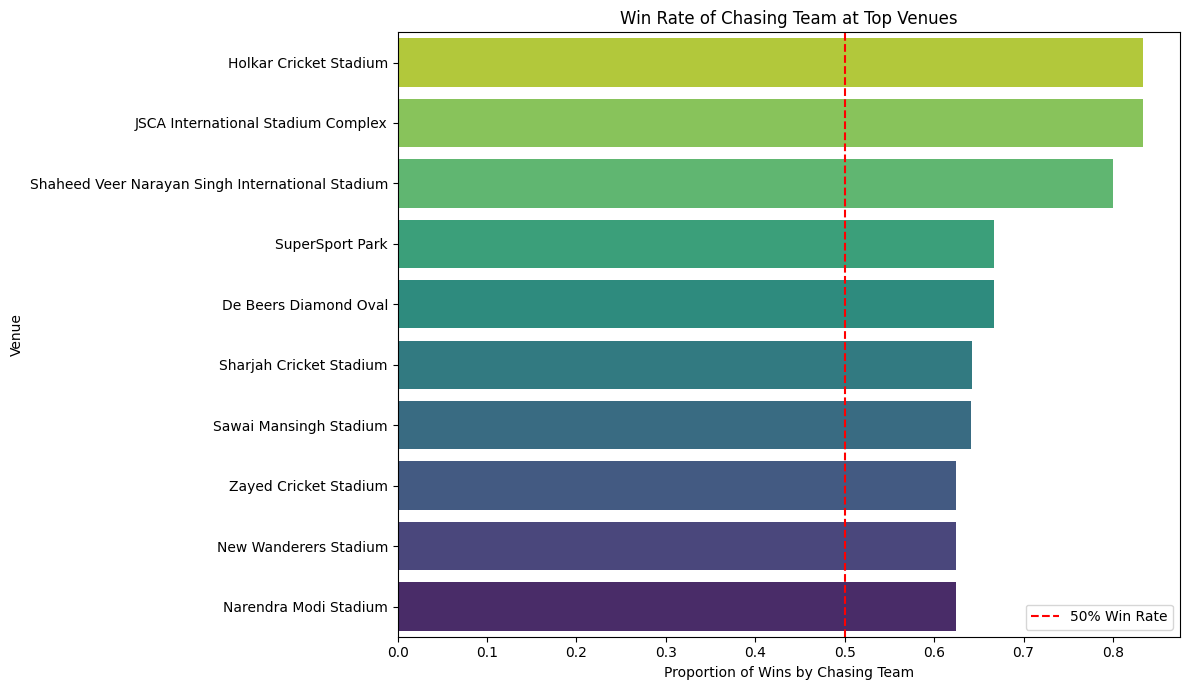

In [8]:
# Toss Decision vs. Chasing Team Won
plt.figure(figsize=(7, 5))
sns.countplot(x='toss_decision', hue='chasing_team_won', data=match_summary_df, palette='YlGnBu')
plt.title('Impact of Toss Decision on Chasing Team Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.legend(title='Chasing Team Won', labels=['Lost', 'Won'])
plt.show()

# Does winning the toss and choosing to field lead to more chase wins?
# Create a feature 'toss_winner_chose_field'
match_summary_df['toss_winner_chose_field'] = (match_summary_df['toss_winner'] == match_summary_df['team2_chase']) & (match_summary_df['toss_decision'] == 'field')
match_summary_df['toss_winner_chose_field'] = match_summary_df['toss_winner_chose_field'] | \
                                            ((match_summary_df['toss_winner'] == match_summary_df['team1_bat_first']) & (match_summary_df['toss_decision'] == 'bat'))
# The above logic means: if toss winner is chasing team and chose field OR toss winner is batting team and chose bat (indirectly means other team fields)
# A simpler way for "did the chasing team win the toss and choose to field?"
match_summary_df['chaser_won_toss_and_fielded'] = np.where(
    (match_summary_df['toss_winner'] == match_summary_df['team2_chase']) & (match_summary_df['toss_decision'] == 'field'), 1, 0
)

if 'chaser_won_toss_and_fielded' in match_summary_df.columns:
    plt.figure(figsize=(7, 5))
    sns.barplot(x='chaser_won_toss_and_fielded', y='chasing_team_won', data=match_summary_df, palette='magma', ci=None)
    plt.title('Win Rate of Chasing Team if They Won Toss & Fielded')
    plt.xlabel('Chasing Team Won Toss and Chose to Field (0 = No, 1 = Yes)')
    plt.ylabel('Proportion of Wins by Chasing Team')
    plt.show()

# Win percentage by venue (for top N venues)
if len(match_summary_df['venue'].unique()) > 1:
    venue_win_rates = match_summary_df.groupby('venue')['chasing_team_won'].mean().sort_values(ascending=False)
    if len(venue_win_rates) > 10: venue_win_rates = venue_win_rates.nlargest(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(y=venue_win_rates.index, x=venue_win_rates.values, palette='viridis_r', orient='h')
    plt.title('Win Rate of Chasing Team at Top Venues')
    plt.xlabel('Proportion of Wins by Chasing Team')
    plt.ylabel('Venue')
    plt.axvline(0.5, color='red', linestyle='--', label='50% Win Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

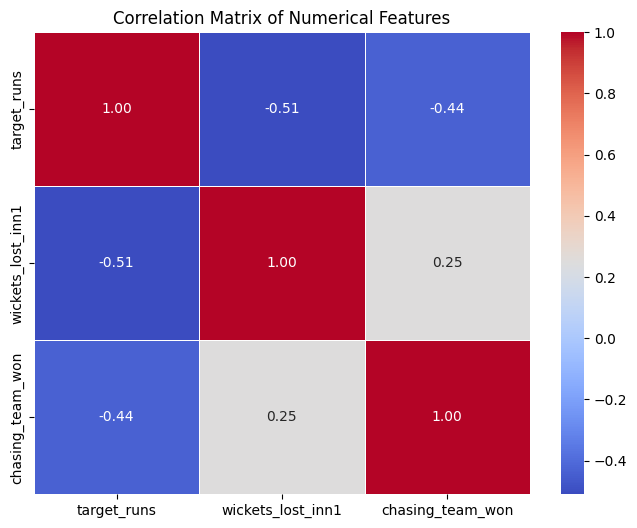

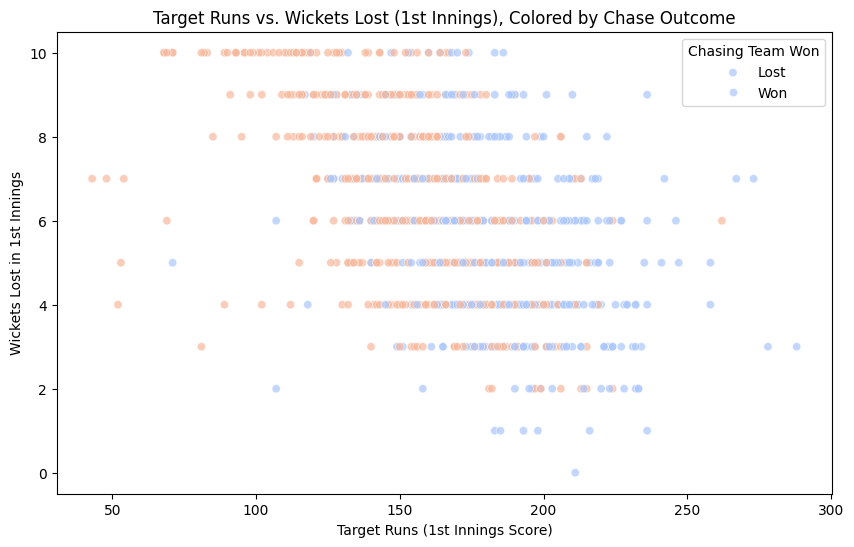

In [9]:
# Correlation heatmap for numerical features
numerical_cols_for_corr = ['target_runs', 'wickets_lost_inn1', 'chasing_team_won']
plt.figure(figsize=(8, 6))
correlation_matrix = match_summary_df[numerical_cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter plot: Target Runs vs Wickets Lost in 1st Innings, colored by Chasing Team Won
plt.figure(figsize=(10, 6))
sns.scatterplot(x='target_runs', y='wickets_lost_inn1', hue='chasing_team_won', data=match_summary_df, palette='coolwarm', alpha=0.7)
plt.title('Target Runs vs. Wickets Lost (1st Innings), Colored by Chase Outcome')
plt.xlabel('Target Runs (1st Innings Score)')
plt.ylabel('Wickets Lost in 1st Innings')
plt.legend(title='Chasing Team Won', labels=['Lost', 'Won'])
plt.show()

*Feature engineering*


In [9]:
match_summary_df.head(3)

,match_id,season,city,date,venue,team1_bat_first,team2_chase,toss_winner,toss_decision,target_runs,wickets_lost_inn1,winner,chasing_team_won,toss_winner_chose_field,chaser_won_toss_and_fielded
0,335982,2008,Bangalore,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,223,3,Kolkata Knight Riders,0,True,1
1,335983,2008,Chandigarh,19-04-2008,Punjab Cricket Association Stadium,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,241,5,Chennai Super Kings,0,True,0
2,335984,2008,Delhi,19-04-2008,Feroz Shah Kotla,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,130,8,Delhi Capitals,1,True,0


In [10]:
match_summary_df.drop(columns=['chasing_team_won', 'toss_winner_chose_field', 'chaser_won_toss_and_fielded'], inplace=True)


In [11]:
# Define a threshold for a high target. This can be tuned.
# Let's start with 190, as scores "close to 200" or above are generally considered high.
high_target_threshold = 190
match_summary_df['is_high_target'] = (match_summary_df['target_runs'] >= high_target_threshold).astype(int)

print(f"\n--- Added 'is_high_target' (threshold >= {high_target_threshold}) ---")
match_summary_df[['target_runs', 'is_high_target']].head()


--- Added 'is_high_target' (threshold >= 190) ---


,target_runs,is_high_target
0,223,1
1,241,1
2,130,0
3,166,0
4,111,0


In [12]:
# Adding 1 to wickets_lost_inn1 to avoid division by zero if a team loses 0 wickets (though rare for a full innings).
# Or, if wickets_lost_inn1 can be 0, consider how to handle. Usually, it's >=1 for an innings.
# If a team is all out (10 wickets), the denominator becomes 11.
match_summary_df['run_wickets_pressure_inn1'] = match_summary_df['target_runs'] / (match_summary_df['wickets_lost_inn1'] + 1)

print("\n--- Added 'run_wickets_pressure_inn1' ---")
match_summary_df[['target_runs', 'wickets_lost_inn1', 'run_wickets_pressure_inn1']].head()


--- Added 'run_wickets_pressure_inn1' ---


,target_runs,wickets_lost_inn1,run_wickets_pressure_inn1
0,223,3,55.750000
1,241,5,40.166667
2,130,8,14.444444
3,166,7,20.750000
4,111,10,10.090909


In [13]:
# --- Recreating the 'chasing_team_won' column ---

# Ensure the required columns exist
if 'winner' not in match_summary_df.columns or 'team2_chase' not in match_summary_df.columns:
    print("Error: The DataFrame must contain 'winner' and 'team2_chase' columns to recreate 'chasing_team_won'.")
    print("Please ensure these columns are present with the correct team names.")
else:
    # Apply the logic
    match_summary_df['chasing_team_won'] = np.where(match_summary_df['winner'] == match_summary_df['team2_chase'], 1, 0)

    print("\n--- DataFrame after recreating 'chasing_team_won' ---")
    print(match_summary_df[['winner', 'team2_chase', 'chasing_team_won']])
    
print("\n--- Final match_summary_df with new features ---")
match_summary_df.head()


--- DataFrame after recreating 'chasing_team_won' ---
                          winner                  team2_chase  \
0          Kolkata Knight Riders  Royal Challengers Bengaluru   
1            Chennai Super Kings                 Punjab Kings   
2                 Delhi Capitals               Delhi Capitals   
3    Royal Challengers Bengaluru  Royal Challengers Bengaluru   
4          Kolkata Knight Riders        Kolkata Knight Riders   
..                           ...                          ...   
958          Sunrisers Hyderabad          Sunrisers Hyderabad   
959        Kolkata Knight Riders        Kolkata Knight Riders   
960             Rajasthan Royals             Rajasthan Royals   
961          Sunrisers Hyderabad             Rajasthan Royals   
962        Kolkata Knight Riders        Kolkata Knight Riders   

     chasing_team_won  
0                   0  
1                   0  
2                   1  
3                   1  
4                   1  
..                ..

,match_id,season,city,date,venue,team1_bat_first,team2_chase,toss_winner,toss_decision,target_runs,wickets_lost_inn1,winner,is_high_target,run_wickets_pressure_inn1,chasing_team_won
0,335982,2008,Bangalore,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,223,3,Kolkata Knight Riders,1,55.750000,0
1,335983,2008,Chandigarh,19-04-2008,Punjab Cricket Association Stadium,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,241,5,Chennai Super Kings,1,40.166667,0
2,335984,2008,Delhi,19-04-2008,Feroz Shah Kotla,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,130,8,Delhi Capitals,0,14.444444,1
3,335985,2008,Mumbai,20-04-2008,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,166,7,Royal Challengers Bengaluru,0,20.750000,1
4,335986,2008,Kolkata,20-04-2008,Eden Gardens,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,111,10,Kolkata Knight Riders,0,10.090909,1


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
cols_to_label_encode = ['city', 'venue', 'team1_bat_first', 'team2_chase', 'toss_winner', 'toss_decision']
label_encoders = {} # To store encoders if you need to inverse_transform later

match_df_processed = match_summary_df.copy() # Create a copy to keep original df intact

for col in cols_to_label_encode:
    if col in match_df_processed.columns:
        print(f"Label Encoding column: {col}")
        le = LabelEncoder()
        match_df_processed[col + '_encoded'] = le.fit_transform(match_df_processed[col])
        label_encoders[col] = le # Store the encoder
        match_df_processed = match_df_processed.drop(col, axis=1) # Drop original string column
    else:
        print(f"Warning: Column {col} not found for Label Encoding.")


print("\n--- DataFrame after Label Encoding (Head) ---")


Label Encoding column: city
Label Encoding column: venue
Label Encoding column: team1_bat_first
Label Encoding column: team2_chase
Label Encoding column: toss_winner
Label Encoding column: toss_decision

--- DataFrame after Label Encoding (Head) ---


In [16]:
match_df_processed.head(3)

,match_id,season,date,target_runs,wickets_lost_inn1,winner,is_high_target,run_wickets_pressure_inn1,chasing_team_won,city_encoded,venue_encoded,team1_bat_first_encoded,team2_chase_encoded,toss_winner_encoded,toss_decision_encoded
0,335982,2008,18-04-2008,223,3,Kolkata Knight Riders,1,55.750000,0,2,16,3,8,8,1
1,335983,2008,19-04-2008,241,5,Chennai Super Kings,1,40.166667,0,6,26,0,6,0,0
2,335984,2008,19-04-2008,130,8,Delhi Capitals,0,14.444444,1,9,11,7,1,7,0


In [17]:
print("\n--- Label Encoding Mappings ---")
for col, le in label_encoders.items():
    print(f"\nColumn: {col}")
    # Create a mapping from encoded value to original class name
    mapping = {encoded_value: class_name for encoded_value, class_name in enumerate(le.classes_)}
    print(mapping)


--- Label Encoding Mappings ---

Column: city
{0: 'Abu Dhabi', 1: 'Ahmedabad', 2: 'Bangalore', 3: 'Bloemfontein', 4: 'Cape Town', 5: 'Centurion', 6: 'Chandigarh', 7: 'Chennai', 8: 'Cuttack', 9: 'Delhi', 10: 'Dharamsala', 11: 'Dubai', 12: 'Durban', 13: 'East London', 14: 'Guwahati', 15: 'Hyderabad', 16: 'Indore', 17: 'Jaipur', 18: 'Johannesburg', 19: 'Kimberley', 20: 'Kolkata', 21: 'Lucknow', 22: 'Mohali', 23: 'Mumbai', 24: 'Nagpur', 25: 'Navi Mumbai', 26: 'Port Elizabeth', 27: 'Pune', 28: 'Raipur', 29: 'Ranchi', 30: 'Sharjah', 31: 'Visakhapatnam'}

Column: venue
{0: 'Arun Jaitley Stadium', 1: 'Barabati Stadium', 2: 'Barsapara Cricket Stadium', 3: 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium', 4: 'Brabourne Stadium', 5: 'Buffalo Park', 6: 'De Beers Diamond Oval', 7: 'Dr DY Patil Sports Academy', 8: 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 9: 'Dubai International Cricket Stadium', 10: 'Eden Gardens', 11: 'Feroz Shah Kotla', 12: 'Himachal Pradesh Cricket As


Correlation with 'chasing_team_won':
chasing_team_won             1.000000
wickets_lost_inn1            0.247288
venue_encoded                0.053370
team1_bat_first_encoded      0.045787
city_encoded                 0.016129
toss_winner_encoded          0.002904
toss_decision_encoded       -0.015974
season                      -0.027761
team2_chase_encoded         -0.067445
run_wickets_pressure_inn1   -0.308212
is_high_target              -0.341592
target_runs                 -0.438108
Name: chasing_team_won, dtype: float64


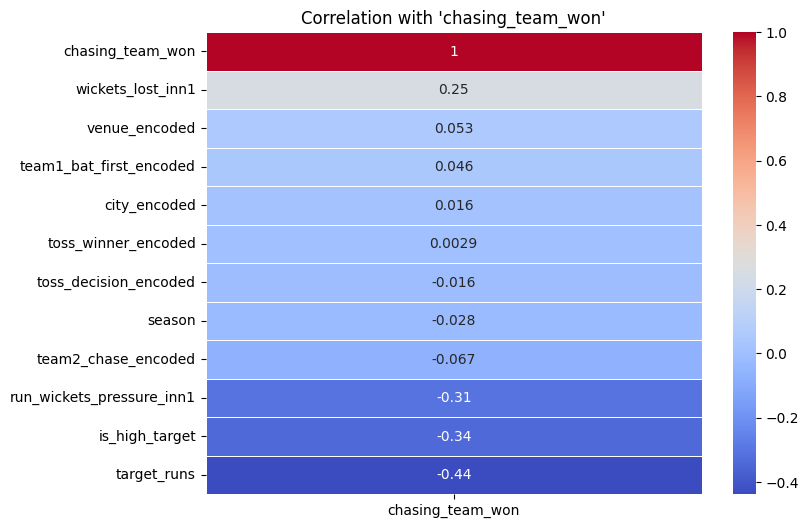

In [18]:
#CORRELATION CHECKING
selected_columns = [
    'target_runs',
    'wickets_lost_inn1',
    'is_high_target',
    'run_wickets_pressure_inn1',
    'chasing_team_won',
    'city_encoded',
    'venue_encoded',
    'team1_bat_first_encoded',
    'team2_chase_encoded',
    'toss_winner_encoded',
    'toss_decision_encoded',
    'season'
]

# --- Assuming your DataFrame is called match_df ---
# Filter only the selected columns
df_selected = match_df_processed[selected_columns]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Get correlation with the target only
target_corr = corr_matrix['chasing_team_won'].sort_values(ascending=False)

# Display correlation values
print("\nCorrelation with 'chasing_team_won':")
print(target_corr)

# Optional: Plot as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_selected.corr()[['chasing_team_won']].sort_values(by='chasing_team_won', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation with 'chasing_team_won'")
plt.show()

Train shape: (686, 11), Test shape: (277, 11)
Train seasons: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Test seasons:  [2021, 2022, 2023, 2024]

--- Evaluation on 2021–2024 test set ---
Accuracy: 0.6426

Confusion Matrix:
[[81 53]
 [46 97]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       134
           1       0.65      0.68      0.66       143

    accuracy                           0.64       277
   macro avg       0.64      0.64      0.64       277
weighted avg       0.64      0.64      0.64       277


--- Feature Importances ---
                      feature  importance
0                 target_runs    0.223727
3   run_wickets_pressure_inn1    0.195787
10                     season    0.093074
4                city_encoded    0.078207
6     team1_bat_first_encoded    0.075070
5               venue_encoded    0.074658
7         team2_chase_encoded    0.068116
1     

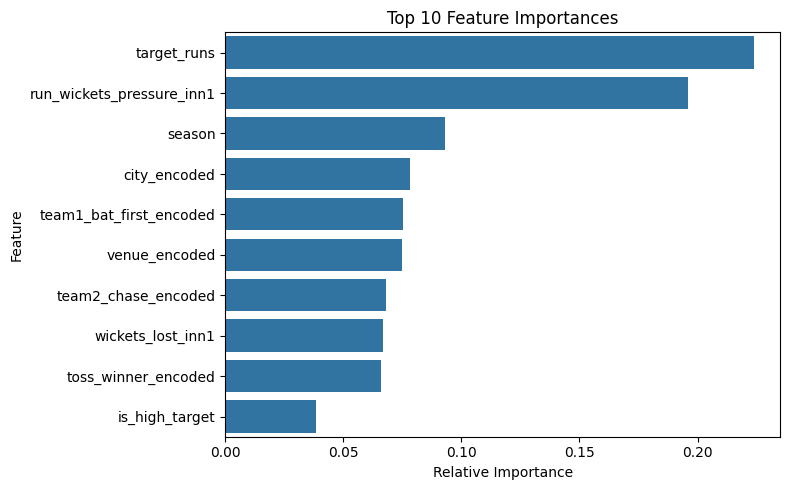

In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns



# --- 1. Define features and target ---
selected_features = [
    'target_runs',
    'wickets_lost_inn1',
    'is_high_target',
    'run_wickets_pressure_inn1',
    'city_encoded',
    'venue_encoded',
    'team1_bat_first_encoded',
    'team2_chase_encoded',
    'toss_winner_encoded',
    'toss_decision_encoded',
    'season',                # include season as a predictor
]
target = 'chasing_team_won'

X = match_df_processed[selected_features]
y = match_df_processed[target]

# --- 2. Chronological split by season ---
train_mask = match_df_processed['season'].between(2008, 2020)
test_mask  = match_df_processed['season'].between(2021, 2024)

X_train = X.loc[train_mask]
X_test  = X.loc[test_mask]
y_train = y.loc[train_mask]
y_test  = y.loc[test_mask]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train seasons: {sorted(match_df_processed.loc[train_mask, 'season'].unique())}")
print(f"Test seasons:  {sorted(match_df_processed.loc[test_mask,  'season'].unique())}")

# --- 3. Train Random Forest ---
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

# --- 4. Predict & Evaluate ---
y_pred = rf_model.predict(X_test)

print("\n--- Evaluation on 2021–2024 test set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# --- 5. Feature Importances ---
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\n--- Feature Importances ---")
print(feat_imp_df)

# --- 6. (Optional) Plot Top 10 importances ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=feat_imp_df.head(10),
    x='importance',
    y='feature',
    orient='h'
)
plt.title("Top 10 Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Training XGBoost...

--- XGBoost Evaluation on 2021–2024 ---
Accuracy: 0.6282

Confusion Matrix:
[[78 56]
 [47 96]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       134
           1       0.63      0.67      0.65       143

    accuracy                           0.63       277
   macro avg       0.63      0.63      0.63       277
weighted avg       0.63      0.63      0.63       277


--- XGBoost Feature Importances ---
                     feature  importance
0  run_wickets_pressure_inn1       412.0
1                target_runs       403.0
2                     season       234.0
3              venue_encoded       217.0
4    team1_bat_first_encoded       158.0
5        team2_chase_encoded       156.0
6        toss_winner_encoded       145.0
7               city_encoded       132.0
8          wickets_lost_inn1        56.0
9      toss_decision_encoded        39.0


c:\Users\nikku\anaconda3\envs\Agents\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:56:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


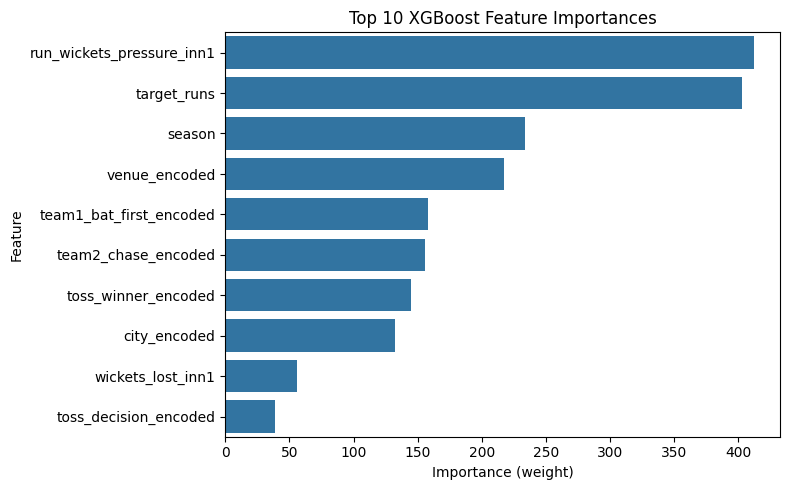

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# --- Train ---
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)

# --- Predict & Evaluate ---
y_pred = xgb_model.predict(X_test)

print("\n--- XGBoost Evaluation on 2021–2024 ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# --- Feature Importances ---
importance_dict = xgb_model.get_booster().get_score(importance_type='weight')
feat_imp_df = (
    pd.DataFrame({
        'feature': list(importance_dict.keys()),
        'importance': list(importance_dict.values())
    })
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
)

print("\n--- XGBoost Feature Importances ---")
print(feat_imp_df)

# --- Plot Top 10 importances ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=feat_imp_df.head(10),
    x='importance',
    y='feature',
    orient='h'
)
plt.title("Top 10 XGBoost Feature Importances")
plt.xlabel("Importance (weight)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Training Logistic Regression...

--- Logistic Regression Evaluation on 2021–2024 ---
Accuracy: 0.6679

Confusion Matrix:
[[92 42]
 [50 93]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       134
           1       0.69      0.65      0.67       143

    accuracy                           0.67       277
   macro avg       0.67      0.67      0.67       277
weighted avg       0.67      0.67      0.67       277


ROC AUC Score: 0.7630


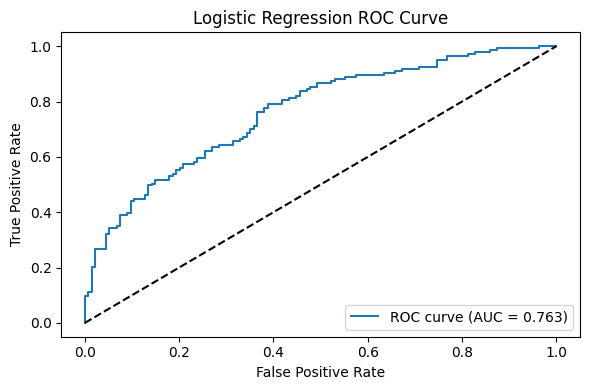


--- Top 10 Features by Absolute Coefficient ---
                    feature  coefficient
0               target_runs    -1.069879
10                   season     0.127186
7       team2_chase_encoded    -0.110147
2            is_high_target    -0.109691
5             venue_encoded     0.077830
1         wickets_lost_inn1     0.067640
4              city_encoded     0.064106
9     toss_decision_encoded     0.059943
6   team1_bat_first_encoded     0.043572
8       toss_winner_encoded     0.029522
Models saved successfully!


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# --- 3. Build pipeline with scaling + Logistic Regression ---
lr_pipeline = Pipeline([  
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        solver='liblinear',       # good default for small datasets
        class_weight='balanced',  # handle any class imbalance
        random_state=42
    ))
])

# --- 4. Train ---
print("\nTraining Logistic Regression...")
lr_pipeline.fit(X_train, y_train)

# --- 5. Predict & Evaluate ---
y_pred = lr_pipeline.predict(X_test)
y_proba = lr_pipeline.predict_proba(X_test)[:, 1]

print("\n--- Logistic Regression Evaluation on 2021–2024 ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC
if len(np.unique(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"\nROC AUC Score: {roc_auc:.4f}")
    
    # Optional: plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# --- 6. Feature Coefficients ---
coefs = lr_pipeline.named_steps['clf'].coef_[0] 
feat_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': coefs
}).assign(abs_coef=lambda df: df['coefficient'].abs()) \
  .sort_values('abs_coef', ascending=False)

print("\n--- Top 10 Features by Absolute Coefficient ---")
print(feat_imp_df[['feature', 'coefficient']].head(10))

# Add the save functions and call them
import pickle

MODEL_PATHS = {
    'random_forest': 'rf_model.pkl',
    'xgboost': 'xgb_model.pkl',
    'logistic_reg': 'lr_pipeline.pkl'
}

def save_models(rf_model, xgb_model, lr_pipeline):
    """Save trained models to pickle files"""
    with open(MODEL_PATHS['random_forest'], 'wb') as f:
        pickle.dump(rf_model, f)
    
    with open(MODEL_PATHS['xgboost'], 'wb') as f:
        pickle.dump(xgb_model, f)
    
    with open(MODEL_PATHS['logistic_reg'], 'wb') as f:
        pickle.dump(lr_pipeline, f)
    
    print("Models saved successfully!")

# Call save_models after all three models are trained
# Make sure you have rf_model and xgb_model defined from previous cells
save_models(rf_model, xgb_model, lr_pipeline)

In [26]:
# Add this to your training notebook after the label encoding step
import pickle

def save_fitted_encoders_from_training(match_summary_df):
    """Save the actual unique values from your training data"""
    fitted_encoders = {}
    from sklearn.preprocessing import LabelEncoder
    
    # Get unique values from your original data
    unique_values = {
        'teams': list(set(list(match_summary_df['team1_bat_first'].unique()) + 
                         list(match_summary_df['team2_chase'].unique()) + 
                         list(match_summary_df['toss_winner'].unique()))),
        'cities': list(match_summary_df['city'].unique()),
        'venues': list(match_summary_df['venue'].unique())
    }
    
    # Create and fit encoders
    for name, values in unique_values.items():
        le = LabelEncoder()
        le.fit(values)
        fitted_encoders[name] = le
    
    # Save encoders
    with open('fitted_label_encoders.pkl', 'wb') as f:
        pickle.dump(fitted_encoders, f)
    
    print("Fitted label encoders saved!")
    return fitted_encoders

# Call this function with your original dataframe (before encoding)
fitted_encoders = save_fitted_encoders_from_training(match_summary_df)

Fitted label encoders saved!


In [28]:
match_df_processed.head()

,match_id,season,date,target_runs,wickets_lost_inn1,winner,is_high_target,run_wickets_pressure_inn1,chasing_team_won,city_encoded,venue_encoded,team1_bat_first_encoded,team2_chase_encoded,toss_winner_encoded,toss_decision_encoded
0,335982,2008,18-04-2008,223,3,Kolkata Knight Riders,1,55.750000,0,2,16,3,8,8,1
1,335983,2008,19-04-2008,241,5,Chennai Super Kings,1,40.166667,0,6,26,0,6,0,0
2,335984,2008,19-04-2008,130,8,Delhi Capitals,0,14.444444,1,9,11,7,1,7,0
3,335985,2008,20-04-2008,166,7,Royal Challengers Bengaluru,0,20.750000,1,23,37,5,8,5,0
4,335986,2008,20-04-2008,111,10,Kolkata Knight Riders,0,10.090909,1,20,10,9,3,9,0


In [29]:
match_summary_df.head()

,match_id,season,city,date,venue,team1_bat_first,team2_chase,toss_winner,toss_decision,target_runs,wickets_lost_inn1,winner,is_high_target,run_wickets_pressure_inn1,chasing_team_won
0,335982,2008,Bangalore,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,223,3,Kolkata Knight Riders,1,55.750000,0
1,335983,2008,Chandigarh,19-04-2008,Punjab Cricket Association Stadium,Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,241,5,Chennai Super Kings,1,40.166667,0
2,335984,2008,Delhi,19-04-2008,Feroz Shah Kotla,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,130,8,Delhi Capitals,0,14.444444,1
3,335985,2008,Mumbai,20-04-2008,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,166,7,Royal Challengers Bengaluru,0,20.750000,1
4,335986,2008,Kolkata,20-04-2008,Eden Gardens,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,111,10,Kolkata Knight Riders,0,10.090909,1
